In [1]:
import os
# no nvlink
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import json

with open('/data/students/juan/train/grocery-item-segmentation-yolo/dataset/annotations/instances_train.json') as file:
    annotations = json.load(file)

print(annotations.keys())
print(annotations['categories'])
category_names = sorted([{'id': ac['id'], 'name': ac['name']} for ac in annotations['categories']], key=lambda x: x['id'])
print(category_names)
print(len(category_names))
print([ac['name'] for ac in category_names])

dict_keys(['images', 'categories', 'annotations'])
[{'id': 16, 'name': 'pineapple juice', 'supercategory': '', 'color': '#d6504a', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'category_id', 'id': 18, 'name': '18'}, {'supercategory': 'type', 'id': 24, 'name': 'GreenCross Ethyl Alcohol'}, {'id': 19, 'name': 'pink_shampoo', 'supercategory': '', 'color': '#35e071', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'type', 'id': 22, 'name': 'toothpaste'}, {'id': 8, 'name': 'garlic', 'supercategory': '', 'color': '#b059f0', 'metadata': {}, 'keypoint_colors': []}, {'id': 14, 'name': 'peanut_butter', 'supercategory': '', 'color': '#dccd1c', 'metadata': {}, 'keypoint_colors': []}, {'id': 6, 'name': 'Cooking_oil', 'supercategory': '', 'color': '#10d39c', 'metadata': {}, 'creator': 'jeryl4913', 'keypoint_colors': []}, {'id': 20, 'name': '20', 'supercategory': '', 'color': '#613fe3', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'type', 'id': 1, 'name': 'bottled_s

Current running training script with YOLO8-nano.

`yolo task=segment mode=train model=yolov8n-seg.pt data=config.yaml epochs=1 imgsz=640`

Current running validation script with YOLO8-nano.

`yolo task=segment mode=val model=yolov8n-seg.pt data=config.yaml epochs=1 imgsz=640`

Current running inference script with YOLO8-nano.

`yolo task=segment mode=predict model=yolov8n-seg.pt source=/data/detection/grocery/dataset/images/val`

References:

* https://docs.ultralytics.com/datasets/segment/#port-or-convert-label-formats
* https://github.com/ultralytics/JSON2YOLO/blob/main/general_json2yolo.py
* https://stackoverflow.com/questions/76651217/how-to-use-one-json-label-file-for-all-the-training-images-for-yolo-nas 
* https://github.com/ultralytics/ultralytics/issues/11268


# Trial 1

YOLO-V8 with 100 epochs, default settings.

In [2]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=config.yaml epochs=100 imgsz=640

New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

In [4]:
!yolo task=segment mode=val model=runs/segment/train3/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,262,744 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070049.jpg: ignoring corrupt image/label: negative label values [-0.0024665]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070056.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.001284]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0047395]
val: WARNING ⚠️ /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/070064.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0024115

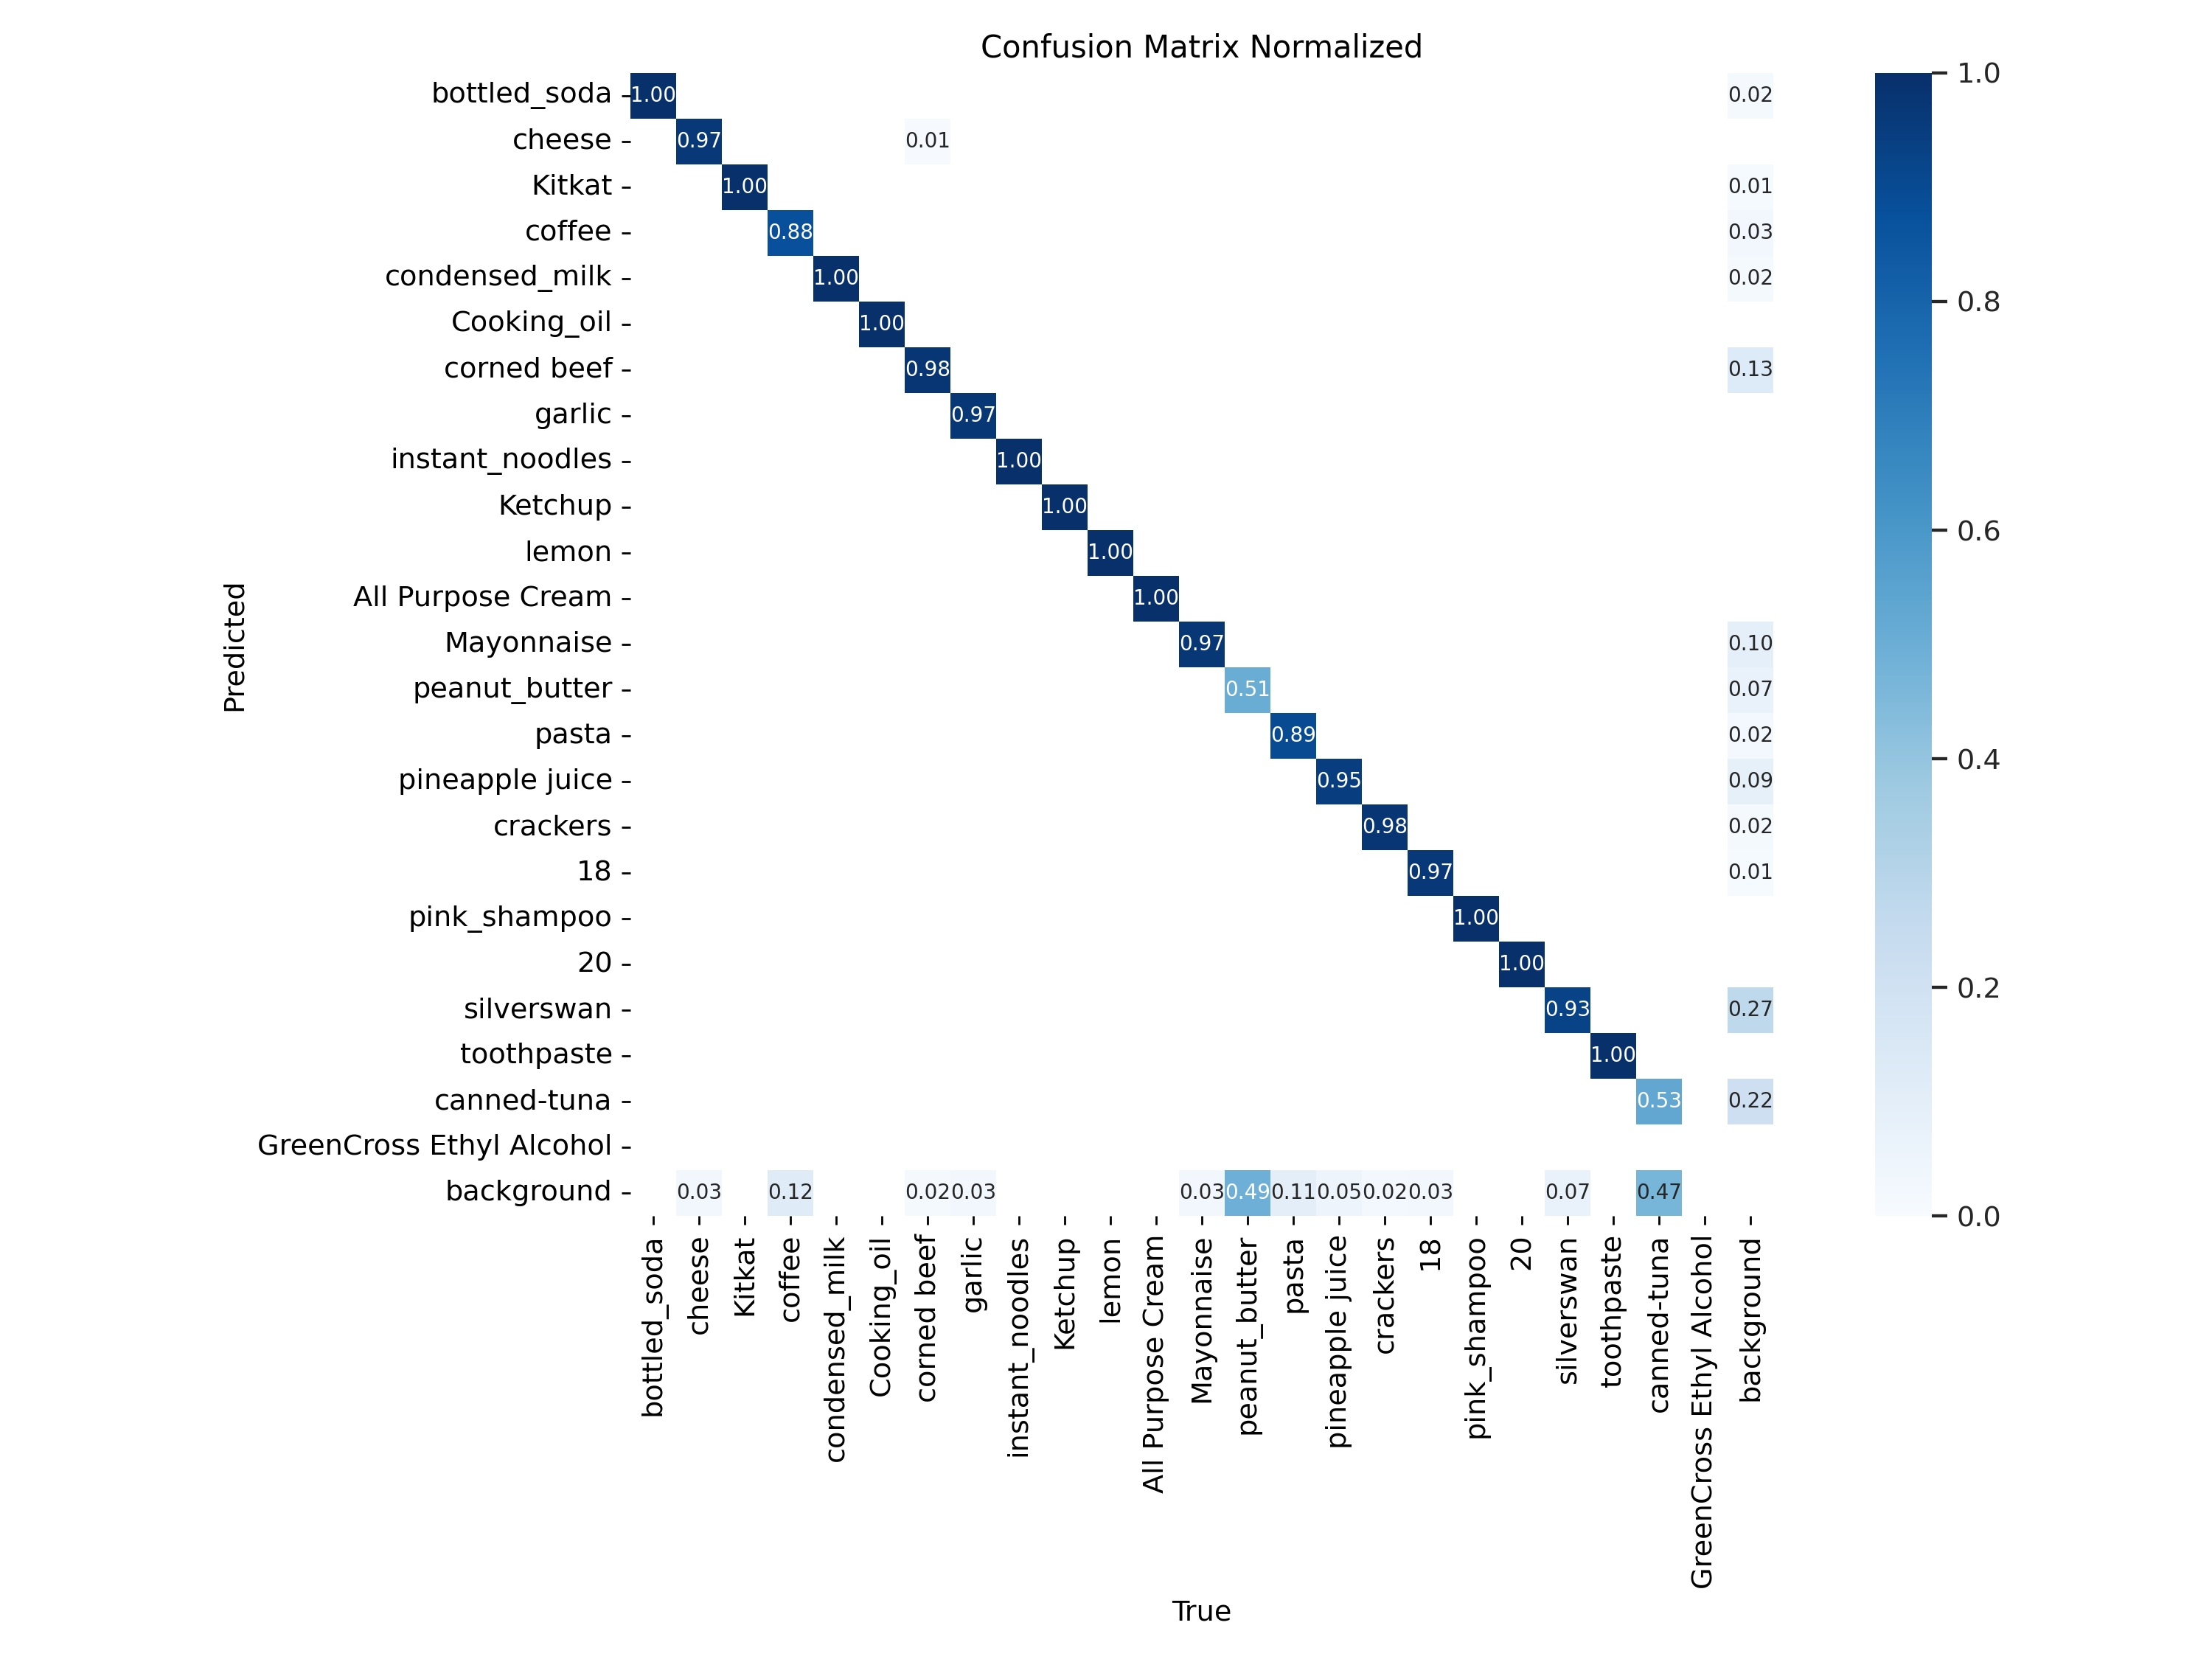

In [ ]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)